# **Random Forest Regressor**

importing required libraries

In [61]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

setiing max rows and max columns in pandas

In [62]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

importing dataset

In [63]:
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


we can observe that level of job is coded according to position of job so position is a redundant feature

dropping redundant features

In [64]:
dataset.drop(columns=['Position'],inplace=True)
print(dataset)

   Level   Salary
0      1    45000
1      2    50000
2      3    60000
3      4    80000
4      5   110000
5      6   150000
6      7   200000
7      8   300000
8      9   500000
9     10  1000000


we dont have any missing values and categorical values

splitting dataset into dependent and independent variables

In [65]:
x=dataset.iloc[:,0:1].values
y=dataset.iloc[:,1].values

splitting into train and test

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

training random forest regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

predicting the test set 

In [68]:
y_pred=rfr.predict(x_test)

r2 score

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9627995867768595

Visualizing the results

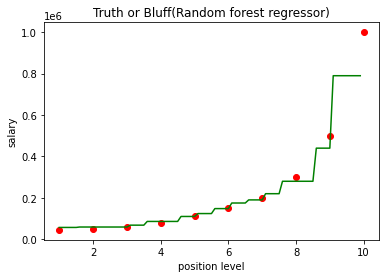

In [72]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,rfr.predict(x_grid),color='green')
plt.title('Truth or Bluff(Random forest regressor)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()